<a href="https://colab.research.google.com/github/marioymario/Human_Resourses_attrition/blob/main/attrition_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition: What are some of the attributes and factors that make an employee leave? 

Employee attrition is a costly challenge faced by most of the employers, it is expensive and time consuming to train new employees. Here we will attempt to understand the relationships between variables and predict employees leaving their jobs for good, based on accuracy.

In [385]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [386]:
## reading the csv filee and storing int in the df objet
PATh = '/content/drive/MyDrive/Megan_benefits/predictingEmployees/\
employeeAttrition/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(PATh, index_col=None)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [388]:
## check for null values
## checking for missing values 
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()


,Total,Percent
YearsWithCurrManager,0,0.0
EmployeeCount,0,0.0
JobLevel,0,0.0
JobInvolvement,0,0.0
HourlyRate,0,0.0


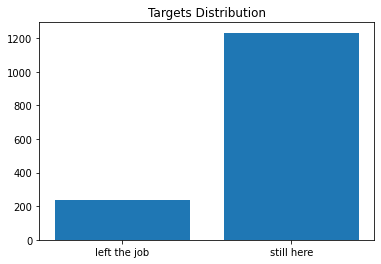

------------------------------
In this data set, we have,
237 ex-employee and 1233, employees
From a total sample of: 1470 people


In [389]:
## checking target variable distribution 
classes = df.Attrition.unique()
counts = []

for i in classes:
  count = len(df[df.Attrition==i])
  counts.append(count)
#plt.bar(classes,counts)  # classes
plt.bar(["left the job", "still here"], counts)
plt.title('Targets Distribution')
plt.show()
## counts
print('------------------------------')
gone = df[df['Attrition'] == 'Yes']
still = df[df['Attrition'] == 'No']
print("In this data set, we have,\n{} ex-employee and {}, employees".format(len(gone), len(still)))
print("From a total sample of: {} people".format(len(gone)+len(still)))

In [390]:
## What are the unique values por columna
for col in df.columns:
  print("columna {}, unique values are: {}".format(col, df[col].unique()))

columna Age, unique values are: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
columna Attrition, unique values are: ['Yes' 'No']
columna BusinessTravel, unique values are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
columna DailyRate, unique values are: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  95

In [391]:
## and the number of unique values per columna
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# Variables numericas 

```
num_features = ['Age','DailyRate','DistanceFromHome','HourlyRate',
                'MonthlyIncome','MonthlyRate','PercentSalaryHike',
                'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
                'YearsSinceLastPromotion','YearsWithCurrManager']
```
y,
# Categorical Variables
```
cat_features = ['BusinessTravel','Department','Education','EducationField',
                'EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel',
                'JobRole','JobSatisfaction','MaritalStatus',
                'NumCompaniesWorked','TrainingTimesLastYear',
                'OverTime','PerformanceRating','RelationshipSatisfaction',
                'StockOptionLevel','WorkLifeBalance']
```




the lenght of the numerical features is: 12


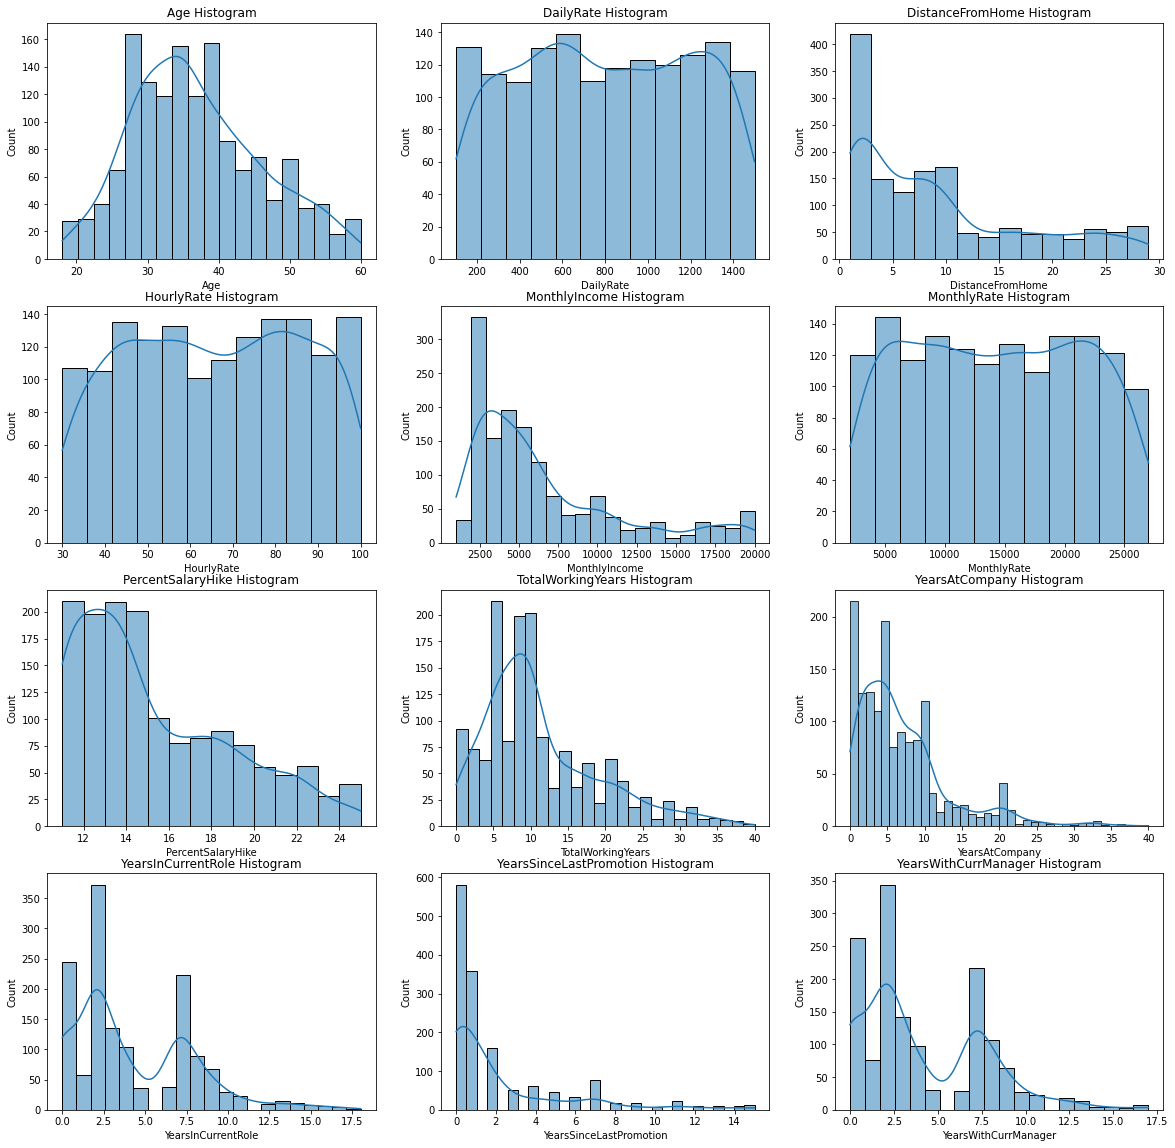

In [392]:
## distributions of numerical
num_features = ['Age','DailyRate','DistanceFromHome','HourlyRate',
                'MonthlyIncome','MonthlyRate','PercentSalaryHike',
                'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
                'YearsSinceLastPromotion','YearsWithCurrManager']

print('the lenght of the numerical features is: {}'.format(len(num_features)))

plt.figure(figsize = (20,20))
for i,feature in enumerate(num_features):
    ax = plt.subplot(4,3,i+1)
    sns.histplot(df[feature],kde = True, palette='Blues_r')
    ax.set_title(feature + " Histogram")

# Outliers from the numerical variables


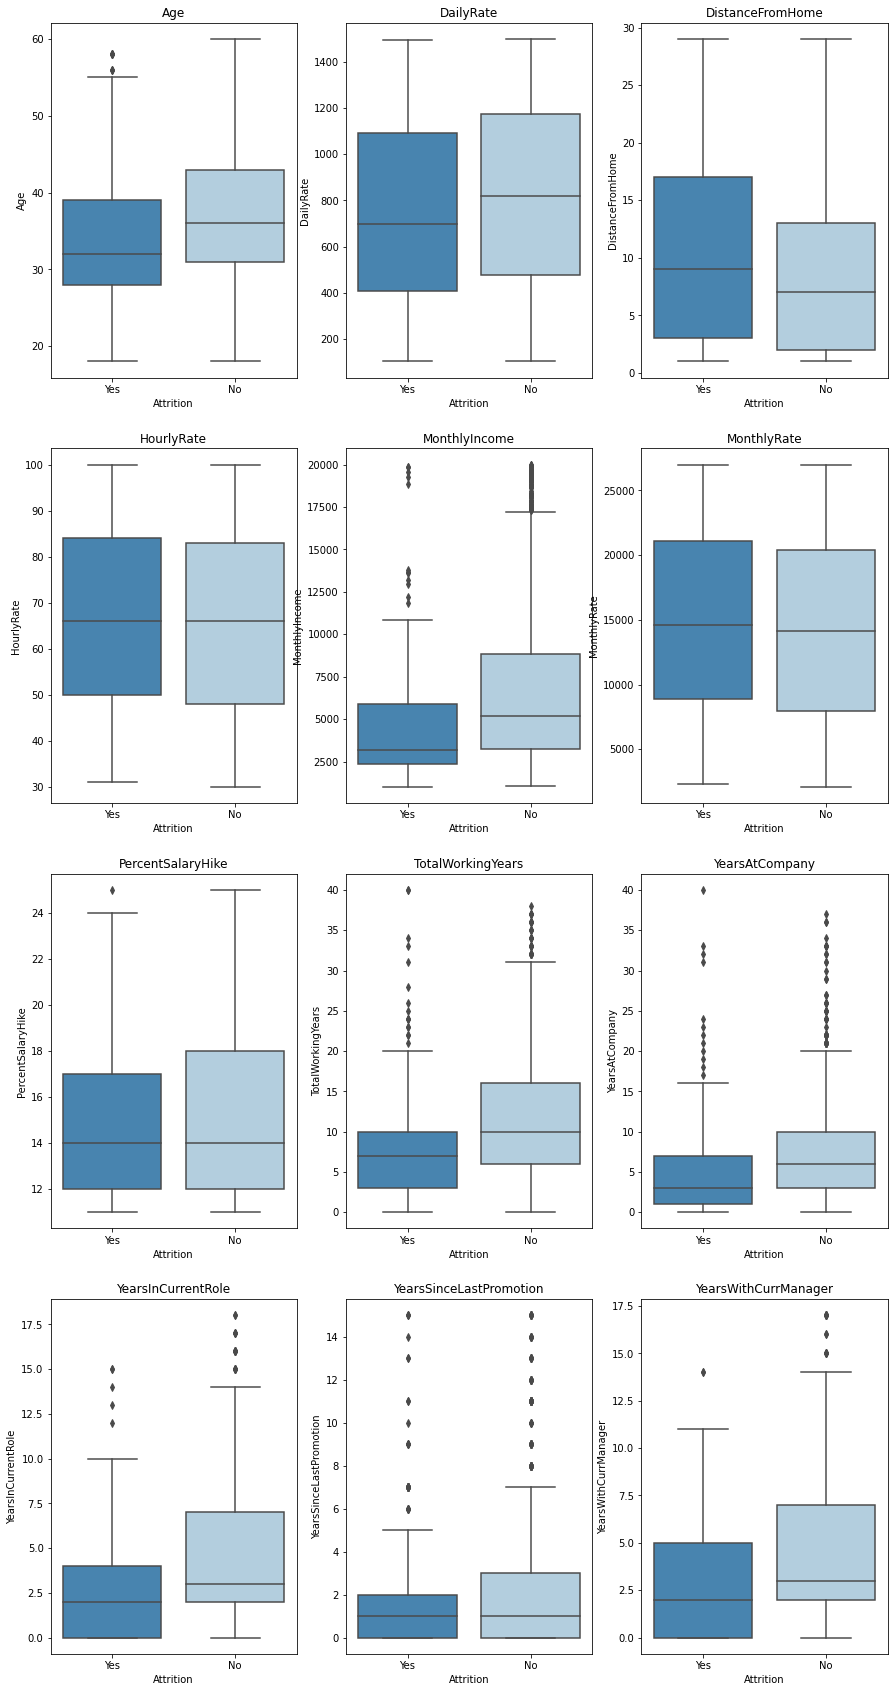

In [393]:
## Numerical outliers
plt.figure(figsize = (15,30))
for i,feature in enumerate(num_features):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(y = df[feature], x = df['Attrition'], palette='Blues_r')
    ax.set_title(feature)

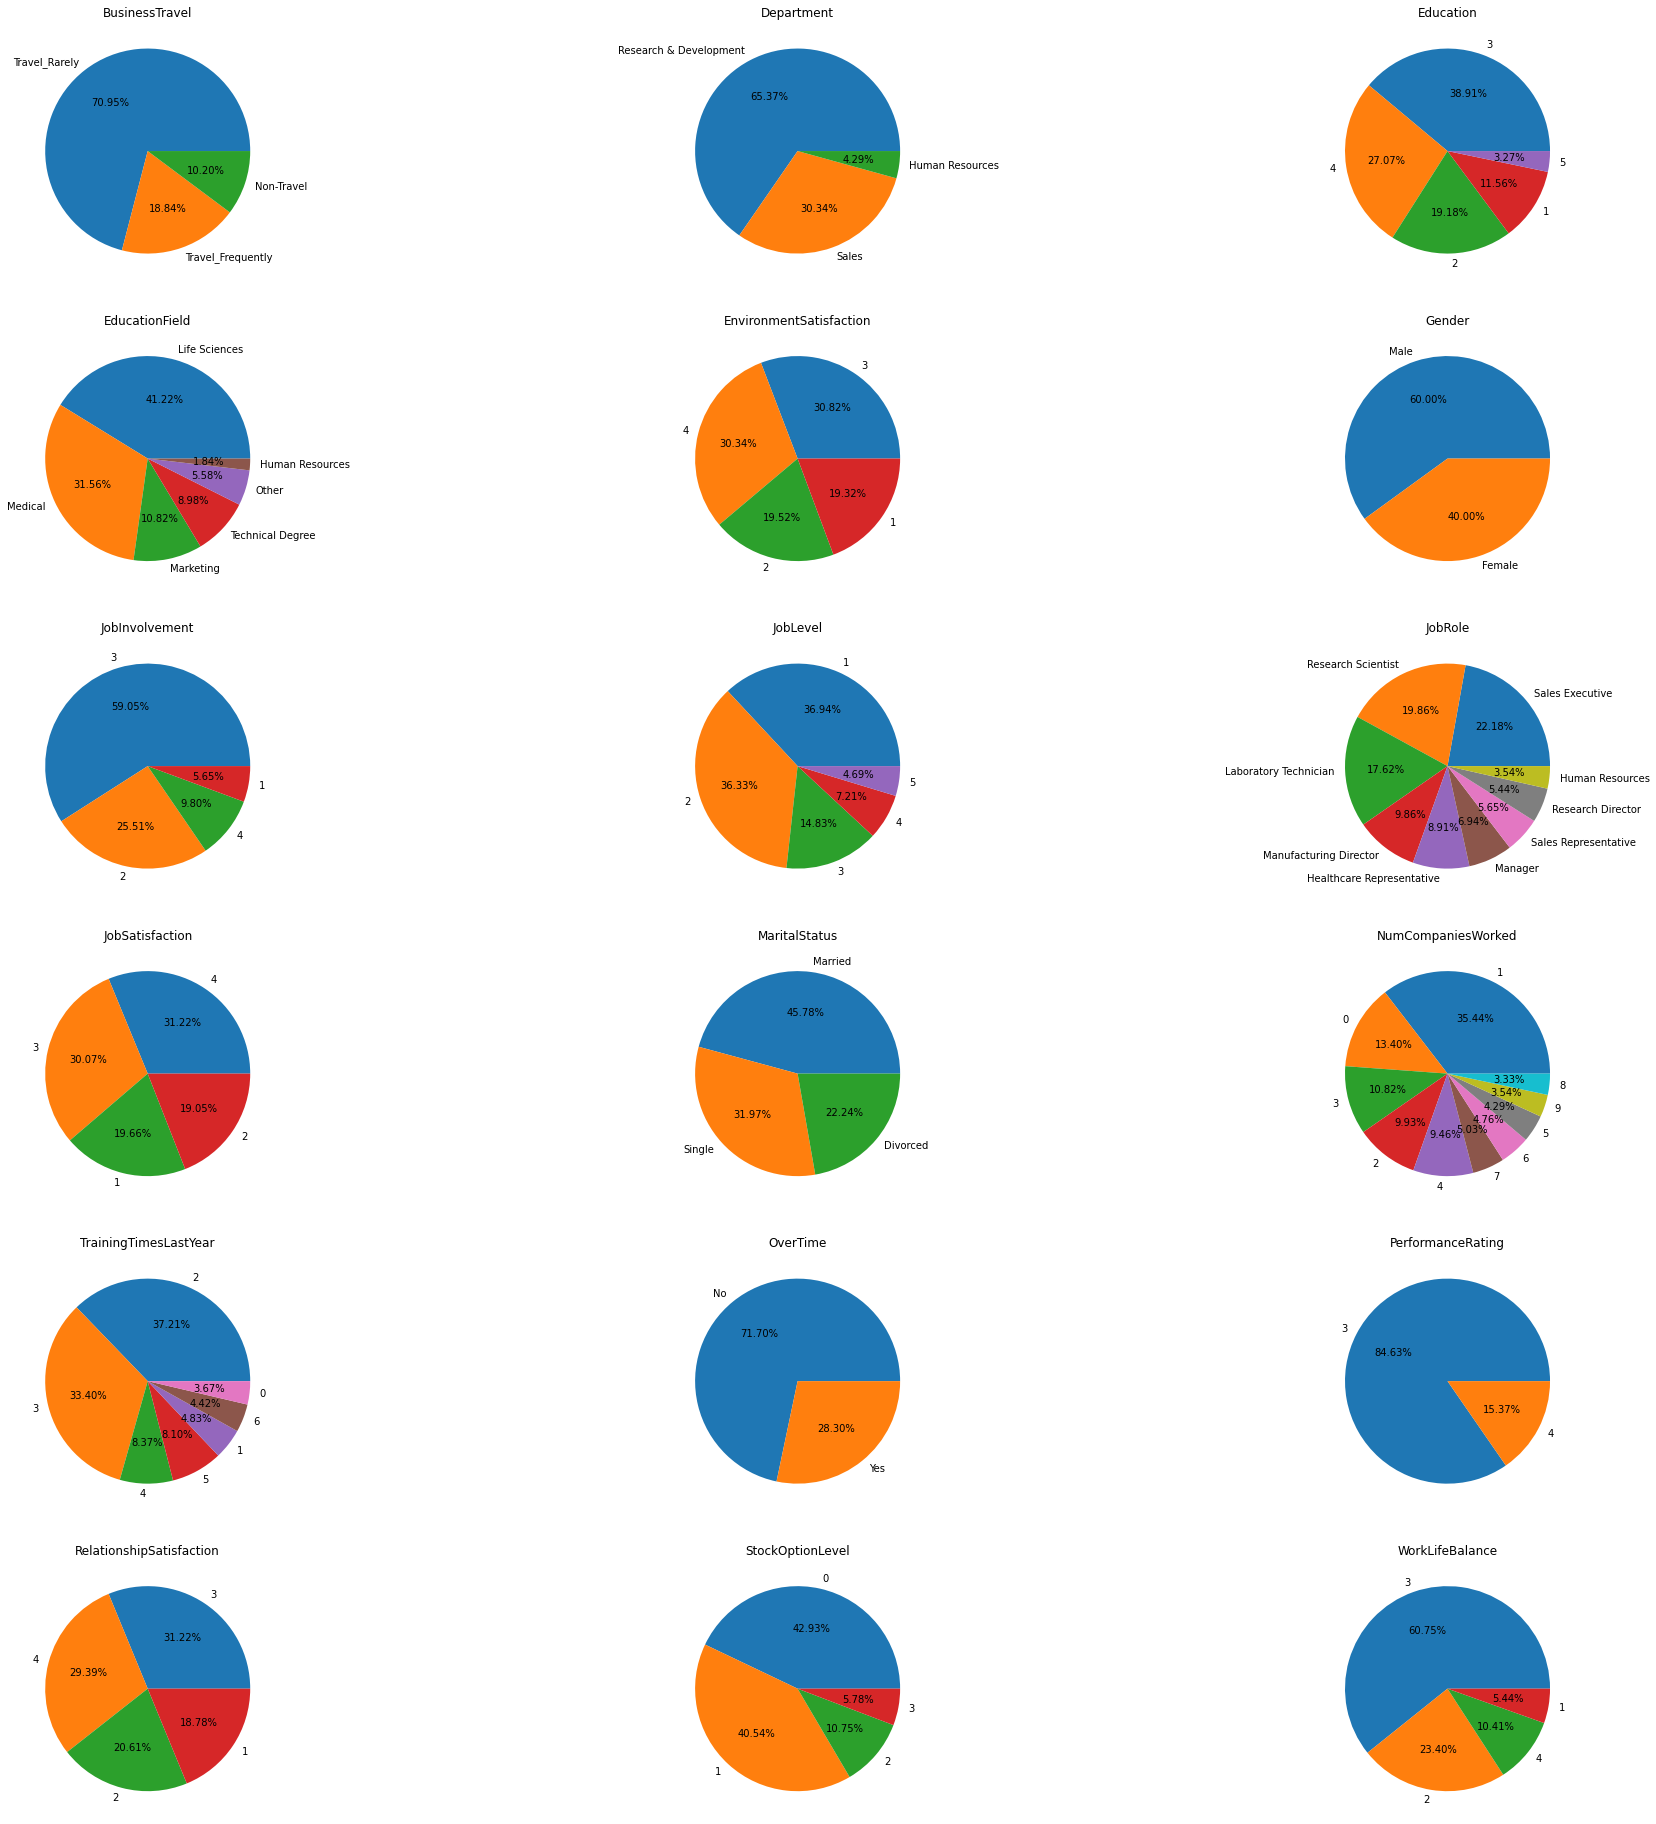

In [394]:
## categorical features
cat_features = ['BusinessTravel','Department','Education','EducationField',
                'EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel',
                'JobRole','JobSatisfaction','MaritalStatus',
                'NumCompaniesWorked','TrainingTimesLastYear',
                'OverTime','PerformanceRating','RelationshipSatisfaction',
                'StockOptionLevel','WorkLifeBalance']
plt.figure(figsize = (33,33))
for i,feature in enumerate(cat_features):
    labels = df[feature].value_counts().index
    size = df[feature].value_counts().values
    ax = plt.subplot(6,3,i+1)
    ax.pie(size,labels = labels,shadow = False,autopct = "%.2f%%",)
    plt.title(feature)
    ax.axis('off')

# Attrition VS features

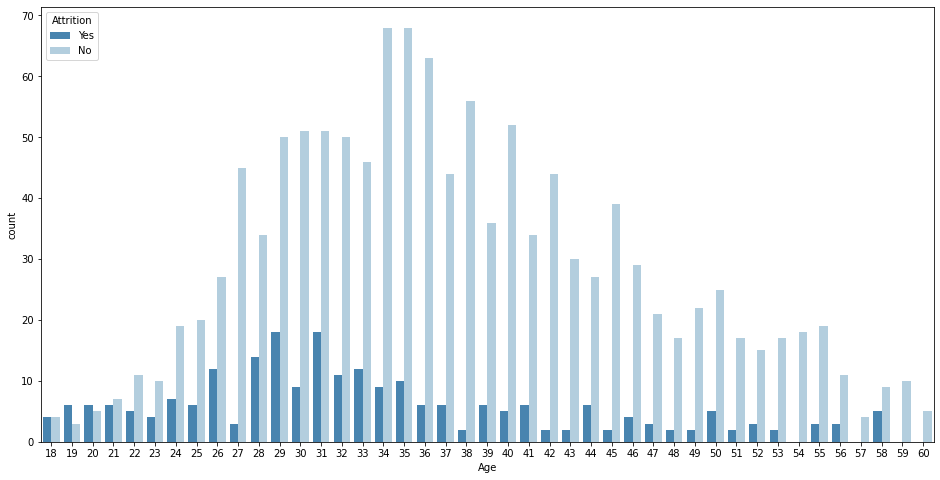

In [395]:
## Attrition and age.
plt.subplots(figsize=(16,8))
sns.countplot(x='Age', hue='Attrition', data=df, palette = 'Blues_r')

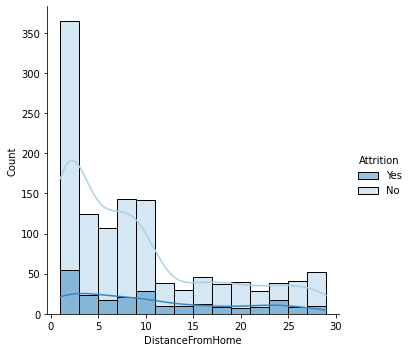

In [396]:
## distance from home vs attrition
sns.displot(x = "DistanceFromHome", hue = "Attrition", data = df,kde = True, palette='Blues_r')

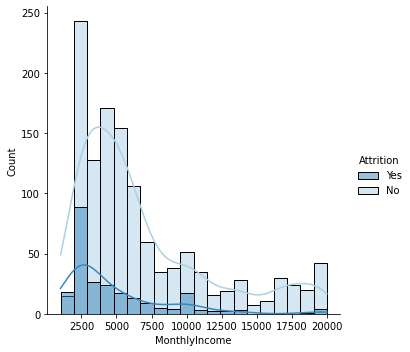

In [397]:
## Income vs Attrition
sns.displot(x = "MonthlyIncome", hue = "Attrition", data = df,kde = True, palette = 'Blues_r')

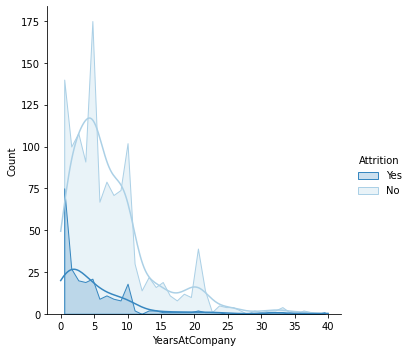

In [398]:
## years at Company
sns.displot(x = "YearsAtCompany",element = "poly", hue = "Attrition", data = df,kde = True, palette = 'Blues_r')

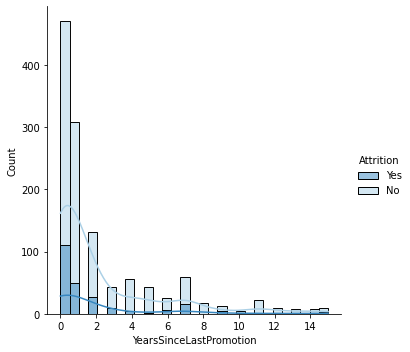

In [399]:
## years since last promotion
sns.displot(x = "YearsSinceLastPromotion",hue = "Attrition", data = df,kde = True, palette='Blues_r')

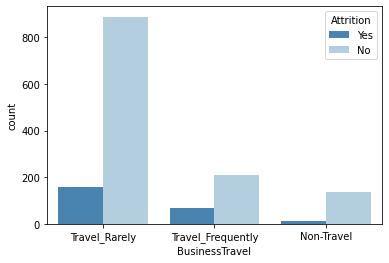

In [400]:
## attrition vs business travels
sns.countplot(x = "BusinessTravel",hue = "Attrition",data = df, palette='Blues_r')

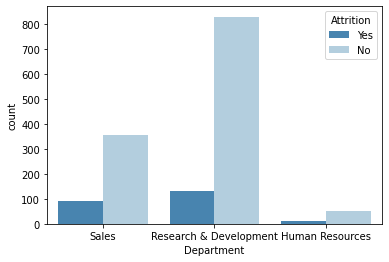

In [401]:
## atrition by departament
df['Department'].unique()
sns.countplot(x = "Department",hue = "Attrition",data = df, palette='Blues_r')

(-1.25, 1.25, -1.25, 1.25)

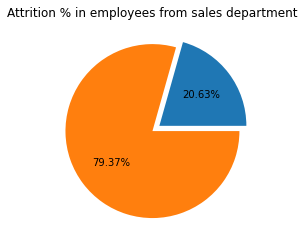

In [402]:
## porcentage per departament:
size = [df['Department'][(df['Attrition'] == 'Yes') & (df['Department'] == 'Sales')].count(),df['Department'][(df['Attrition'] == 'No') & (df['Department'] == 'Sales')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from sales department')
plt.axis()


(-1.25, 1.25, -1.25, 1.25)

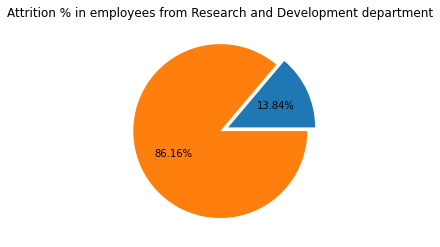

In [403]:
size = [df['Department'][(df['Attrition'] == 'Yes') & (df['Department'] == 'Research & Development')].count(),df['Department'][(df['Attrition'] == 'No') & (df['Department'] == 'Research & Development')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from Research and Development department')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

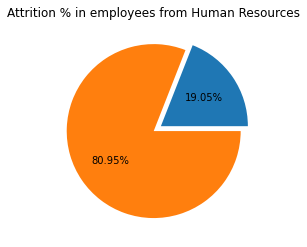

In [404]:
size = [df['Department'][(df['Attrition'] == 'Yes') & (df['Department'] == 'Human Resources')].count(),df['Department'][(df['Attrition'] == 'No') & (df['Department'] == 'Human Resources')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from Human Resources')
plt.axis('off')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

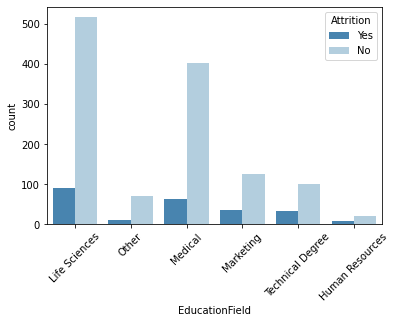

In [405]:
## Education vs Attrition
sns.countplot(x = "EducationField",hue = "Attrition",data = df, palette='Blues_r')
plt.xticks(rotation = 45)

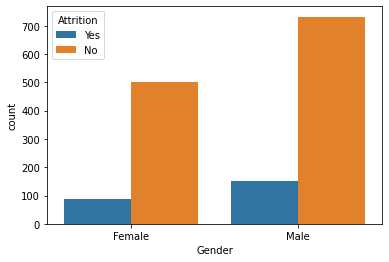

In [406]:
## gender vs attrition
sns.countplot(x = "Gender",hue = "Attrition",data = df)

(-1.25, 1.25, -1.25, 1.25)

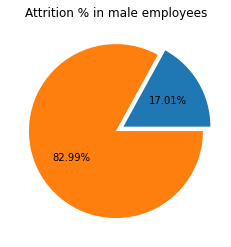

In [407]:
## atrition % for men
size = [df['Gender'][(df['Attrition'] == 'Yes') & (df['Gender'] == 'Male')].count(),df['Gender'][(df['Attrition'] == 'No') & (df['Gender'] == 'Male')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in male employees')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

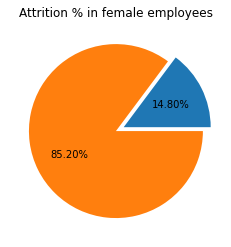

In [408]:
## atrition % for women
size = [df['Gender'][(df['Attrition'] == 'Yes') & (df['Gender'] == 'Female')].count(),df['Gender'][(df['Attrition'] == 'No') & (df['Gender'] == 'Female')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in female employees')
plt.axis('off')

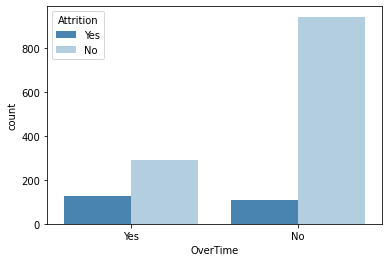

In [409]:
## overtime vs Attrition
sns.countplot(x = "OverTime",hue = "Attrition",data = df, palette='Blues_r')

(-1.25, 1.25, -1.25, 1.25)

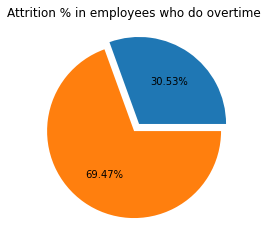

In [410]:
## Attrition % in employees that do overtime
size = [df['OverTime'][(df['Attrition'] == 'Yes') & (df['OverTime'] == 'Yes')].count(),df['OverTime'][(df['Attrition'] == 'No') & (df['OverTime'] == 'Yes')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who do overtime')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

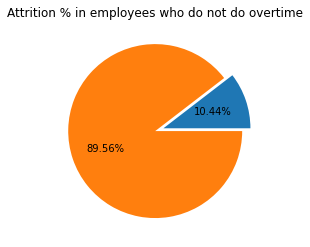

In [411]:
## Attrition % in employees that do not overtime
size = [df['OverTime'][(df['Attrition'] == 'Yes') & (df['OverTime'] == 'No')].count(),df['OverTime'][(df['Attrition'] == 'No') & (df['OverTime'] == 'No')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who do not do overtime')
plt.axis('off')

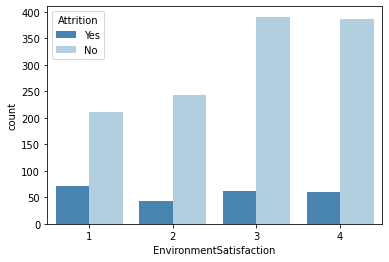

In [412]:
## enviorioment Satisfaction vs Attrition
sns.countplot(x = "EnvironmentSatisfaction",hue = "Attrition",data = df, palette='Blues_r')

(-1.25, 1.25, -1.25, 1.25)

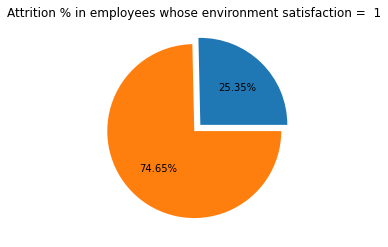

In [413]:
## Attrition % in employees whose environment satisfaction is one start
size = [df['EnvironmentSatisfaction'][(df['Attrition'] == 'Yes') & (df['EnvironmentSatisfaction'] == 1)].count(),df['EnvironmentSatisfaction'][(df['Attrition'] == 'No') & (df['EnvironmentSatisfaction'] == 1)].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees whose environment satisfaction =  1')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

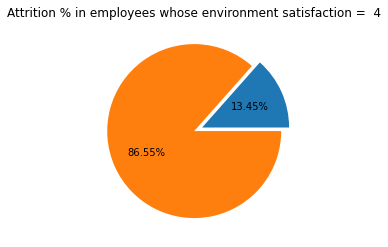

In [414]:
## Attrition % in employees whose environment satisfaction is 4 starts
size = [df['EnvironmentSatisfaction'][(df['Attrition'] == 'Yes') & (df['EnvironmentSatisfaction'] == 4)].count(),df['EnvironmentSatisfaction'][(df['Attrition'] == 'No') & (df['EnvironmentSatisfaction'] == 4)].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees whose environment satisfaction =  4')
plt.axis('off')

# From the observed

##      - Most employees are from Research & Development department (65.37 %)
##      - Most employees have medium (Bachelor's) level of education (38.91 %)
##      - Most employees have Sales executive as their job role(22.18 %)
##      - As expected Attrition is relatively higher in employees with lower monthly income
##      - Attrition starts decreasing as employee's years at company reaches to 15 years
##      - MonthlyIncome, Age, PercentSalaryHike and YearsAtCompany features are greatly impacting Attrition rate.
##      - Attrition percentage is highest in employees who travel frequently(24.91 %)
##      - Attrition percentage is highest in employees who are from Sales department(20.63 %)
##      - Attrition percentage is highest in employees who are from Technical degree education field(24.24 %)
##      - Attrition percentage is highest in male employees (17.01 %)
##      - Attrition percentage is highest in employees who do overtime(30.53 %)
##      - Attrition percentage is highest in employees who has 1(low) of Environment Satisfaction(25.35 %)

In [415]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [417]:
## dropping columns with information that I think is not relevant
## or could miss lead us
df.drop(['EmployeeCount'],axis = 1, inplace = True)
df.drop(['StandardHours'],axis = 1,inplace = True)
df.drop(['Over18'],axis = 1,inplace = True)
df.drop(['EmployeeNumber'],axis = 1,inplace = True)

In [418]:
## Encoding
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


# Coorelation
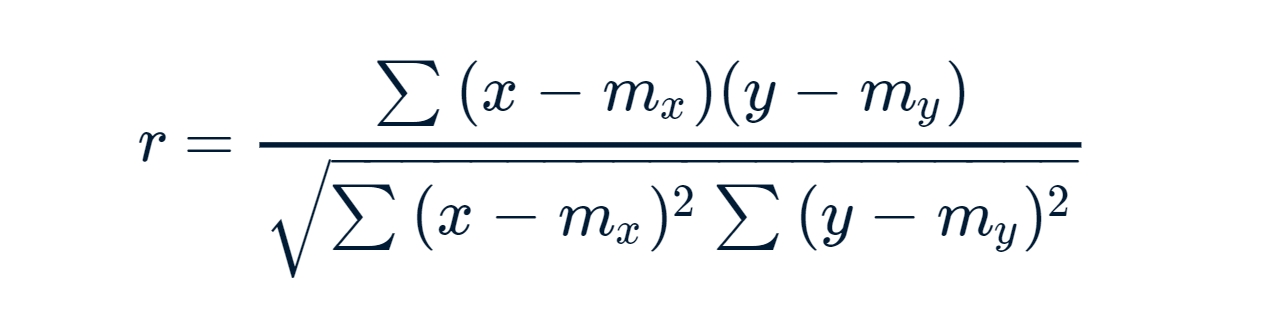

In [419]:
total_corr = np.abs(df.corr().loc['Attrition']).sort_values(ascending=False)
corr_df = pd.DataFrame(total_corr)
corr_df

,Attrition
Attrition,1.000000
OverTime,0.246118
MonthlyIncome,0.196165
TotalWorkingYears,0.171571
JobLevel,0.169105
MaritalStatus,0.162070
YearsInCurrentRole,0.160545
Age,0.159205
YearsWithCurrManager,0.156199
StockOptionLevel,0.137145


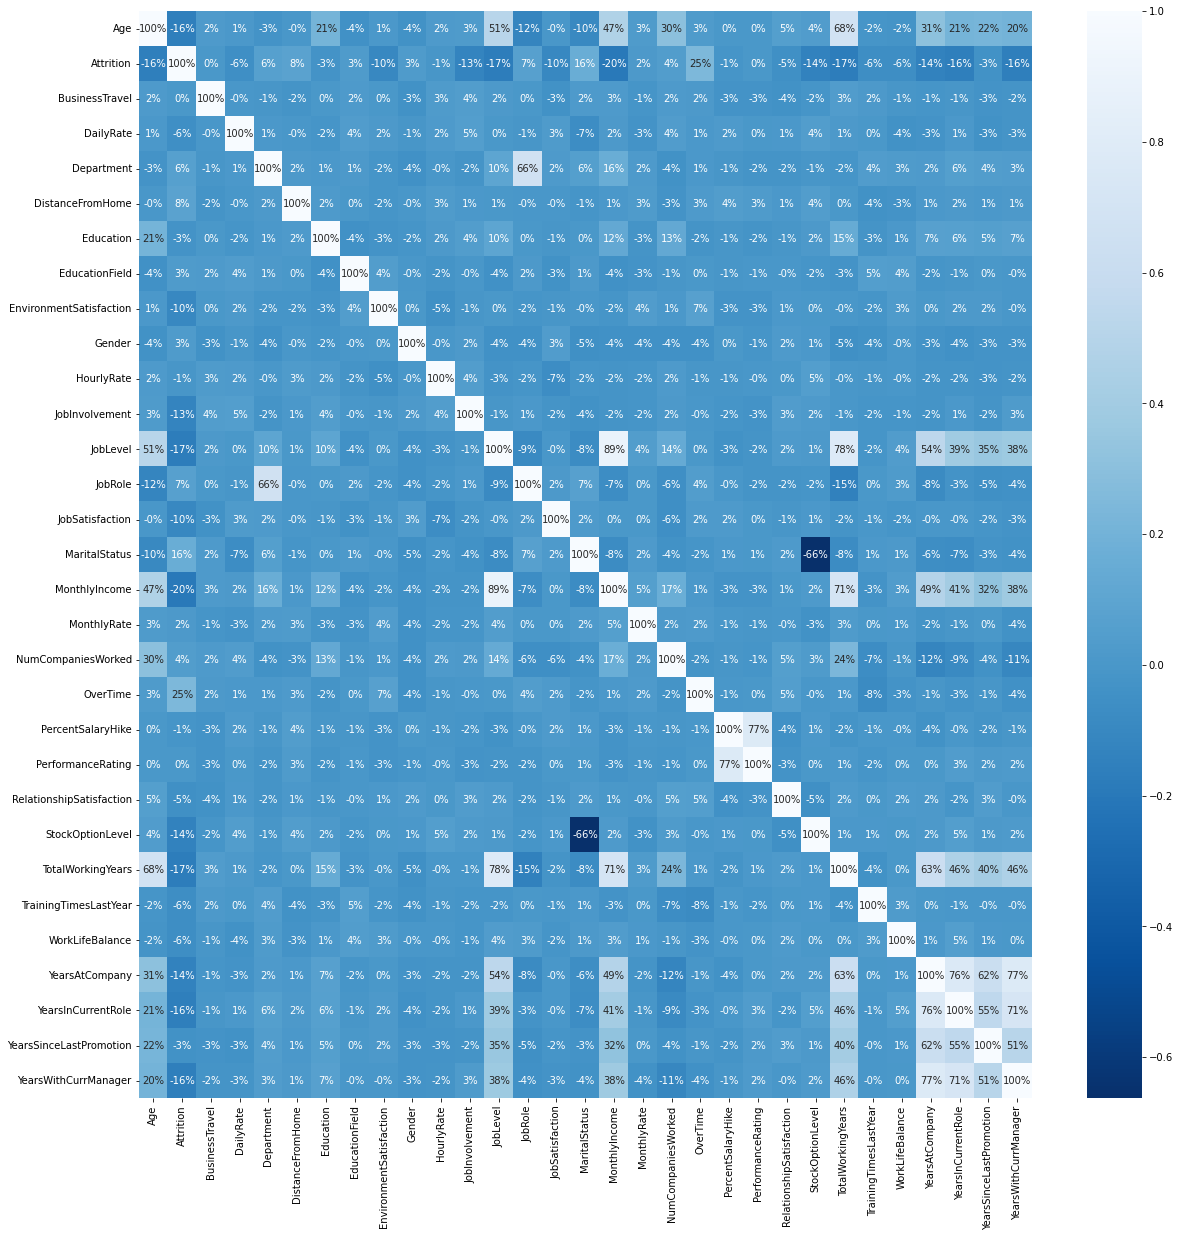

In [420]:
## Coorelation
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), annot=True, fmt='.0%',cmap='Blues_r' )

In [421]:
## some other columns dropped
df = df.drop(['BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis = 1).copy()
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,624,0,1,1,64,2,1,3,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,113,7,0,2,31,1,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,805,1,1,3,62,1,0,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,820,2,3,3,26,2,0,2,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,312,1,0,0,10,2,0,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


In [422]:
## X and y
y = df['Attrition']
X = df.drop(['Attrition'], axis=1)

In [423]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EnvironmentSatisfaction   1470 non-null   int64
 5   HourlyRate                1470 non-null   int64
 6   JobInvolvement            1470 non-null   int64
 7   JobLevel                  1470 non-null   int64
 8   JobSatisfaction           1470 non-null   int64
 9   MonthlyIncome             1470 non-null   int64
 10  MonthlyRate               1470 non-null   int64
 11  NumCompaniesWorked        1470 non-null   int64
 12  OverTime                  1470 non-null   int64
 13  PercentSalaryHike         1470 non-null   int64
 14  PerformanceRating         1470 non-null 

In [424]:
y.shape

(1470,)

# Splitting data for modeling 

In [425]:
## spliting. 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

In [426]:
## making sure everything is in the same format
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [427]:
## Model 1 
## Logistic Regression (linear classifier)
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.874


In [428]:
## Model 2
## Support Vector Machine (linear classifier)
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.861


In [429]:
## Model 3 KKn
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.850


In [430]:
## Model 4 KKn different amount of K (vecinos)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_5_score = knn.score(X_test, y_test)
knn_5_predictions = knn.predict(X_test)
print('Accuracy of KNN (k = 5): {:.3f}'.format(knn_5_score))

Accuracy of KNN (k = 5): 0.854


In [431]:
## Model 6 Deciosion tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_score = dt.score(X_test, y_test)
dt_predictions = dt.predict(X_test)
print('Accuracy of Decision Tree: {:.3f} '.format(dt_score))

Accuracy of Decision Tree: 0.823 


In [432]:
## Model 7 Random Forest
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)
rf.fit(X_train,y_train)
rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)
print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 0.857


# Logistic regression has the highest accuracy
Accuracy of Logistic Regression: 0.874

Accuracy of SVM: 0.861

Accuracy of KNN: 0.850

Accuracy of Decision Tree: 0.837

Accuracy of Random Forest: 0.857

In [433]:
## comparation
predictions_dictionary = {'Logistic Regression' : lr_predictions, 'KNN_7' : knn_7_predictions, 
                          'KNN_5': knn_5_predictions, 'SVM' : svm_predictions, 'Decision Tree' : dt_predictions, 
                          'Random Forest' : rf_predictions, 'Actual': y_test}

predictions_df = pd.DataFrame(predictions_dictionary)
predictions_df.head(20)

,Logistic Regression,KNN_7,KNN_5,SVM,Decision Tree,Random Forest,Actual
100,1,0,0,0,1,0,1
260,0,0,0,0,1,0,0
410,0,0,0,0,0,0,0
1311,0,0,0,0,1,1,0
1220,0,0,0,0,0,0,0
612,1,0,0,0,1,0,0
1042,0,0,0,0,0,0,0
670,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0
677,0,0,0,0,1,0,0


As logistic regression have the highest accuracy we are going to
# Build a logistic regression and adjust its hyperparametes
we will use Grid search for this.

In [434]:
best_model = LogisticRegression

In [435]:
## parameters to adjust
grider = [
              {'penalty' : ['l2'],
               'solver' : ['lbfgs'],
               'max_iter' : [15000]
               }
]

In [436]:
grid = GridSearchCV(LogisticRegression(), param_grid=grider, cv= 4, verbose=True, n_jobs=-1)

In [437]:
grid.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.2s finished


tuned hpyerparameters :(best parameters)  {'max_iter': 15000, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8698979591836734


# after some tunning the automatic tunning preform better.

In [438]:
## Model 1 
## Logistic Regression (linear classifier)
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.874


In [439]:
# print classification report
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       253
           1       0.57      0.39      0.46        41

    accuracy                           0.87       294
   macro avg       0.74      0.67      0.70       294
weighted avg       0.86      0.87      0.86       294



# Conclusion
With the analysis that we just made we took a look into variables that determinates attrition some of them being long hours of work or inadequate compensation.

High attrition compromises the value of a company. It causes companies to lose knowledge, spend money and time in training,  obstructs scheduled projects and make the bussines and employees fall in a never ending cycle of complications. Employee recruiting and retention are big issues for organizations, and create a work environment where the employees are confortable is primordial.

